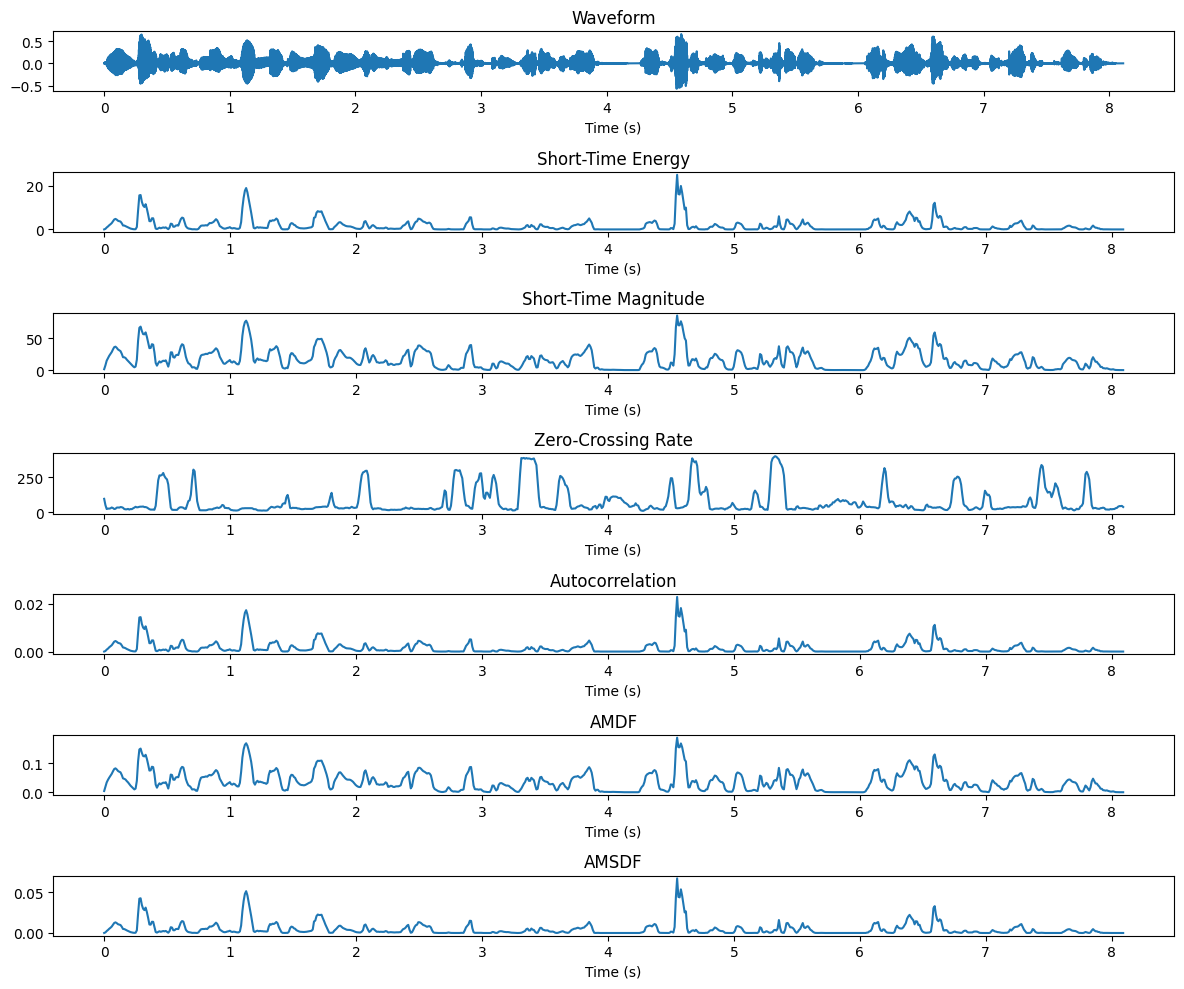

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.signal
import soundfile as sf

# Load speech sample
file_path = "C:\\Users\\prana\\Downloads\\LJ001-0005.wav"  # Change this to your .wav file path
signal, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate

# Set frame parameters
frame_size = int(0.025 * sr)  # 25ms frame size
hop_size = int(0.01 * sr)  # 10ms hop size
hamming_window = np.hamming(frame_size)  # Hamming window

# Frame-wise processing
def frame_wise_processing(signal, frame_size, hop_size):
    num_frames = int(np.ceil((len(signal) - frame_size) / hop_size)) + 1
    frames = np.zeros((num_frames, frame_size))

    for i in range(num_frames):
        start = i * hop_size
        end = start + frame_size
        frames[i, :] = signal[start:end] * hamming_window if end < len(signal) else np.pad(signal[start:], (0, end - len(signal))) * hamming_window
    return frames

frames = frame_wise_processing(signal, frame_size, hop_size)

# Feature Extraction Functions
def short_time_energy(frames):
    return np.sum(frames**2, axis=1)

def short_time_magnitude(frames):
    return np.sum(np.abs(frames), axis=1)

def zero_crossing_rate(frames):
    return np.sum(np.abs(np.diff(np.sign(frames), axis=1)), axis=1) / 2

def autocorrelation(frames):
    return np.array([np.correlate(frame, frame, mode='full')[frame_size-1:] for frame in frames])

def amdf(frames):
    num_frames, frame_size = frames.shape
    amdf_values = np.zeros((num_frames, frame_size))
    for k in range(frame_size):
        amdf_values[:, k] = np.mean(np.abs(frames[:, :frame_size-k] - frames[:, k:]), axis=1)
    return np.mean(amdf_values, axis=1)

def amsdf(frames):
    num_frames, frame_size = frames.shape
    amsdf_values = np.zeros((num_frames, frame_size))
    for k in range(frame_size):
        amsdf_values[:, k] = np.mean((frames[:, :frame_size-k] - frames[:, k:])**2, axis=1)
    return np.mean(amsdf_values, axis=1)

# Compute Features
ste = short_time_energy(frames)
stm = short_time_magnitude(frames)
zcr = zero_crossing_rate(frames)
autocorr = np.mean(autocorrelation(frames), axis=1)
amdf_values = amdf(frames)
amsdf_values = amsdf(frames)

# Time axis
time_frames = np.arange(len(ste)) * (hop_size / sr)

# Plot Features
plt.figure(figsize=(12, 10))
plt.subplot(7, 1, 1)
plt.plot(np.arange(len(signal)) / sr, signal)
plt.title("Waveform")
plt.xlabel("Time (s)")

plt.subplot(7, 1, 2)
plt.plot(time_frames, ste, label="STE")
plt.title("Short-Time Energy")
plt.xlabel("Time (s)")

plt.subplot(7, 1, 3)
plt.plot(time_frames, stm, label="STM")
plt.title("Short-Time Magnitude")
plt.xlabel("Time (s)")

plt.subplot(7, 1, 4)
plt.plot(time_frames, zcr, label="ZCR")
plt.title("Zero-Crossing Rate")
plt.xlabel("Time (s)")

plt.subplot(7, 1, 5)
plt.plot(time_frames, autocorr, label="Autocorrelation")
plt.title("Autocorrelation")
plt.xlabel("Time (s)")

plt.subplot(7, 1, 6)
plt.plot(time_frames, amdf_values, label="AMDF")
plt.title("AMDF")
plt.xlabel("Time (s)")

plt.subplot(7, 1, 7)
plt.plot(time_frames, amsdf_values, label="AMSDF")
plt.title("AMSDF")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()
